In [13]:
import re

In [14]:
string = 'algo_123'




PES_result_scan_rc_19118.csv
Highest energy point:	13
Lowest energy reactant:	0.0
\Delta E\ddag:        	14.240       	kcal/mol
\Delta E\ddag REAL:   	14.240       	kcal/mol
\Delta E:        	-21.440       	kcal/mol
\Delta E REAL:   	-21.440       	kcal/mol

PES_result_scan_rc_19800.csv
Highest energy point:	12
Lowest energy reactant:	-0.07593
\Delta E\ddag:        	11.701       	kcal/mol
\Delta E\ddag REAL:   	11.777       	kcal/mol
\Delta E:        	-21.198       	kcal/mol
\Delta E REAL:   	-21.122       	kcal/mol

PES_result_scan_rc_6228.csv
Highest energy point:	17
Lowest energy reactant:	0.0
\Delta E\ddag:        	17.397       	kcal/mol
\Delta E\ddag REAL:   	17.397       	kcal/mol
\Delta E:        	-21.630       	kcal/mol
\Delta E REAL:   	-21.630       	kcal/mol

PES_result_scan_rc_23559.csv
Highest energy point:	22
Lowest energy reactant:	-0.13939
\Delta E\ddag:        	20.267       	kcal/mol
\Delta E\ddag REAL:   	20.406       	kcal/mol
\Delta E:        	-20.408       	kcal/mo

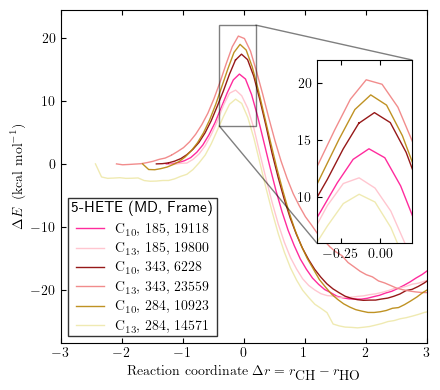

In [15]:

import os
import subprocess
bash = '/opt/homebrew/bin/bash'
import numpy as np

# plotting
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('lines', lw=1, color='b')
rc('legend', loc='best')
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams['legend.borderpad'] = 0.25
plt.rcParams['legend.fontsize'] = 11
plt.rcParams.update({'pgf.preamble': r'\usepackage{amsmath}'})

def execute(command_str):
    subprocess.run(command_str, shell=True, executable=bash)



def plot_scan(csv_list, single_csv=True, add_info=[], title='', color_sets='', lims_y=[], savename='', y_lim_inf=None):
    '''
    Plot energy vs rc. 

    Multiple rcs can be plotted. csv files are supplied as [csv1, csv2, etc]
    '''

    # color lists
    colors = ['darkviolet', 'deeppink', 'darkred', 'crimson',  'darkgreen', 'mediumseagreen',  'darkblue', 'royalblue',]

    data_list = [np.genfromtxt(csv, delimiter=',') for csv in csv_list]
    
    if single_csv:

        for i in range(len(csv_list)):

            # generate time figure
            ncols=2
            fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(4.5*ncols, 4))

            data = data_list[i]
            _rc = data[1:, 1]
            _energy_hartree = data[1:, 2] / 627.509
            _delta_E = data[1:, 3]
            max_index = np.argmax(_energy_hartree)
            min_index = np.argmin(_energy_hartree)
            print(f'{csv_list[i]}')
            print(f'Highest energy point:\t{max_index+1}')
            print(f'QM/MM energy (max):  \t{_energy_hartree[max_index]:.6f} Hartree')
            print(r'\D'+f'elta E:        \t{_delta_E[max_index]:.3f}        kcal/mol')
            print(f'QM/MM energy (min):  \t{_energy_hartree[max_index]:.6f} Hartree')
            print(r'\D'+f'elta E:        \t{_delta_E[min_index]:.3f}        kcal/mol')
            _ch = data[1:, 4]
            _oh = data[1:, 5]
            #print(_delta_E)
            #print(_ch)
            #print(_oh)

            for j in range(ncols):
                if j==0:
                    axes[j].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
                    axes[j].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")
                    axes[j].plot(_rc, _delta_E, color=colors[i], alpha=0.9)
                    
                    axes[j].set(xlabel=r'$\textnormal{Reaction coordinate}\;\Delta r = r_{\textnormal{CH}}-r_{\textnormal{HO}}$', ylabel=r'$\Delta E\;\;(\textnormal{kcal mol}^{-1})$')

                if j==1:
                    axes[j].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
                    axes[j].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")
                     
                    axes[j].plot(_rc, _ch, color='darkgreen', alpha=0.9, label=r'$\textnormal{'+f'C--H'+r' }$')
                    axes[j].plot(_rc, _oh, color='deeppink', alpha=0.9, label=r'$\textnormal{'+f'H--O'+r' }$')
                    
                    axes[j].set(xlabel=r'$\textnormal{Reaction coordinate}\;\Delta r = r_{\textnormal{CH}}-r_{\textnormal{HO}}$', ylabel=r'$\textnormal{Distance (Å)}$')
                    axes[j].legend(loc='best', prop={'size': 10}, title=r'$\textsf{'+f'Distance'+r'}$', title_fontsize=11)


      
    else:
        ncols=1
        fig, axes = plt.subplots(ncols=ncols, nrows=1, figsize=(4.5*ncols, 4))

        axes.tick_params(bottom=True, top=True, left=True, right=False,direction="in")
        axes.tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")
        axins = axes.inset_axes([0.7, 0.30, 0.26, 0.55])
        axins.tick_params(bottom=True, top=True, left=True, right=False,
                                direction="in")
        axins.tick_params(labelbottom=True, labeltop=False, labelleft=True,
                                labelright=False, direction="in")
        
        if color_sets != '':
            if color_sets == 'reds':
                colors = ['deeppink', 'pink', 'darkred', 'lightcoral', 'darkgoldenrod', 'palegoldenrod']

            elif color_sets == 'blues':
                colors = ['darkgreen', 'mediumaquamarine',  'darkblue', 'cornflowerblue', 'darkviolet', 'plum']


        for i in range(len(csv_list)):
            data = data_list[i]
            _rc = data[1:, 1]
            _energy_hartree = data[1:, 2] / 627.509
            _delta_E = data[1:, 3]
            _delta_E_reactant = []
            for j in range(len(_rc)):
                if _rc[j] < 0:
                    _delta_E_reactant.append(_delta_E[j])

            max_index = np.argmax(_energy_hartree)
            reactant_minimum = np.argmin(_delta_E_reactant)
            min_index = np.argmin(_energy_hartree)
            _delta_E_reactant_kcalmol = _delta_E[max_index] - _delta_E[reactant_minimum]
            _delta_E_product_kcalmol = _delta_E[min_index] - _delta_E[reactant_minimum]
            print(f'{csv_list[i]}')
            print(f'Highest energy point:\t{max_index+1}')
            print(f'Lowest energy reactant:\t{_delta_E[reactant_minimum]}')
            #print(f'QM/MM energy (max):  \t{_energy_hartree[max_index]:.6f}\tHartree')
            print(r'\Delta E\ddag'+f':        \t{_delta_E[max_index]:.3f}       \tkcal/mol')
            print(r'\Delta E\ddag REAL'+f':   \t{_delta_E_reactant_kcalmol:.3f}       \tkcal/mol')
            #print(f'QM/MM energy (min):  \t{_energy_hartree[max_index]:.6f}\tHartree')
            print(r'\D'+f'elta E:        \t{_delta_E[min_index]:.3f}       \tkcal/mol')
            print(r'\D'+f'elta E REAL:   \t{_delta_E_product_kcalmol:.3f}       \tkcal/mol')
            print()
            _ch = data[1:, 4]
            _oh = data[1:, 5]
            #print(_delta_E)
            #print(_ch)
            #print(_oh)

    
            

            axes.plot(_rc, _delta_E, color=colors[i], alpha=0.9, label=r'$\textnormal{' +f'{add_info[i]},  {re.findall(r'\d+', csv_list[i])[-1]}' + r'}$')
            axins.plot(_rc[:], _delta_E[:], color=colors[i], alpha=0.9)

        axins.set_xlim(-0.4, 0.2)
        if lims_y != []:
            axins.set_ylim(lims_y[0], lims_y[1])
        else:
            axins.set_ylim(6, 24)
        axes.set(xlabel=r'$\textnormal{Reaction coordinate}\;\Delta r = r_{\textnormal{CH}}-r_{\textnormal{HO}}$', ylabel=r'$\Delta E\;\;(\textnormal{kcal mol}^{-1})$')    
        if title != '':
            axes.legend(loc='lower left', prop={'size': 10}, title=r'$\textsf{'+f'{title}'+r'}$', title_fontsize=11)
        else:
            axes.legend(loc='lower left', prop={'size': 10}, title=r'$\textsf{'+f'Scan'+r'}$', title_fontsize=11)
        axes.indicate_inset_zoom(axins, edgecolor="black")                    

    axes.set_xlim(-3, 3)
    if y_lim_inf is not None:
        axes.set_ylim(bottom=y_lim_inf)
    plt.tight_layout()
    if savename != '':
        plt.savefig(f'./{savename}', dpi=400)
    else:
        plt.savefig(f'scan_energy.png', dpi=400)
    plt.show(fig)


#add_info = [r'C$_{10}$, 185', r'C$_{13}$, 185', r'C$_{10}$, 343', r'C$_{13}$, 343']
#csv_list_5HETE = ['PES_result_scan_rc_19118.csv', 'PES_result_scan_rc_19800.csv', 'PES_result_scan_rc_6228.csv', 'PES_result_scan_rc_23559.csv']

add_info = [r'C$_{10}$, 185', r'C$_{13}$, 185', r'C$_{10}$, 343', r'C$_{13}$, 343', r'C$_{10}$, 284', r'C$_{13}$, 284',]

#csv_list_5HETE = ['PES_result_scan_rc_19118.csv', 'PES_result_scan_rc_19800.csv', 'PES_result_scan_rc_6228.csv', 'PES_result_scan_rc_23559.csv', 'PES_result_scan_rc_6831.csv', 'PES_result_scan_rc_5273.csv']
csv_list_5HETE = ['PES_result_scan_rc_19118.csv', 'PES_result_scan_rc_19800.csv', 'PES_result_scan_rc_6228.csv', 'PES_result_scan_rc_23559.csv', 'PES_result_scan_rc_10923.csv', 'PES_result_scan_rc_14571.csv']


plot_scan(csv_list_5HETE, single_csv=False, title='5-HETE (MD, Frame)', add_info=add_info, color_sets='reds', lims_y=[6, 22], savename='5-HETE_scan.png')

PES_result_scan_rc_21843.csv
Highest energy point:	36
Lowest energy reactant:	0.0
\Delta E\ddag:        	19.720       	kcal/mol
\Delta E\ddag REAL:   	19.720       	kcal/mol
\Delta E:        	-18.982       	kcal/mol
\Delta E REAL:   	-18.982       	kcal/mol

PES_result_scan_rc_8948.csv
Highest energy point:	14
Lowest energy reactant:	0.0
\Delta E\ddag:        	14.732       	kcal/mol
\Delta E\ddag REAL:   	14.732       	kcal/mol
\Delta E:        	-20.530       	kcal/mol
\Delta E REAL:   	-20.530       	kcal/mol

PES_result_scan_rc_17305.csv
Highest energy point:	38
Lowest energy reactant:	0.0
\Delta E\ddag:        	19.426       	kcal/mol
\Delta E\ddag REAL:   	19.426       	kcal/mol
\Delta E:        	-21.245       	kcal/mol
\Delta E REAL:   	-21.245       	kcal/mol

PES_result_scan_rc_19212.csv
Highest energy point:	13
Lowest energy reactant:	0.0
\Delta E\ddag:        	14.682       	kcal/mol
\Delta E\ddag REAL:   	14.682       	kcal/mol
\Delta E:        	-22.186       	kcal/mol
\Delta E

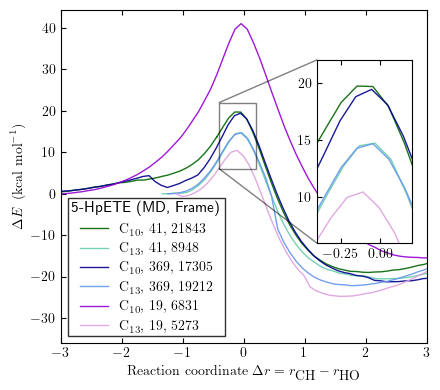

In [16]:

#add_info = [r'C$_{10}$, 41', r'C$_{13}$, 41', r'C$_{10}$, 369', r'C$_{13}$, 369']
#csv_list_5HpETE = ['PES_result_scan_rc_21843.csv', 'PES_result_scan_rc_8948.csv', 'PES_result_scan_rc_17305.csv', 'PES_result_scan_rc_19212.csv']

add_info = [r'C$_{10}$, 41', r'C$_{13}$, 41', r'C$_{10}$, 369', r'C$_{13}$, 369', r'C$_{10}$, 19', r'C$_{13}$, 19']
#csv_list_5HpETE = ['PES_result_scan_rc_21843.csv', 'PES_result_scan_rc_8948.csv', 'PES_result_scan_rc_17305.csv', 'PES_result_scan_rc_19212.csv', 'PES_result_scan_rc_10923.csv', 'PES_result_scan_rc_14571.csv']
csv_list_5HpETE = ['PES_result_scan_rc_21843.csv', 'PES_result_scan_rc_8948.csv', 'PES_result_scan_rc_17305.csv', 'PES_result_scan_rc_19212.csv', 'PES_result_scan_rc_6831.csv', 'PES_result_scan_rc_5273.csv']
plot_scan(csv_list_5HpETE, single_csv=False, title='5-HpETE (MD, Frame)', add_info=add_info, color_sets='blues', lims_y=[6, 22], savename='5-HpETE_scan.png', y_lim_inf=-36)
print()

In [17]:
# ultim hi ha dos practicament iguals pel C13. Ambdos casos són molt poc planars. Pel cas C10, un és molt pla i l'altre el perpendicular
# però el que fa és girar (amb una barrera d'uns 4kcal/mol i després ja està ben orientat)

In [18]:
# del HETE, és 19118 molt pla, 19800 perpendicular, 6228 molt pla, 23559 bastant perpendicular

# del HpETE, m21843 molt pla, 8948 perpendicular, 17305 perpendicular, 19212 poc planar. 